In [10]:
import os
os.chdir("/nfs/students/winter-term-2020/project-4/yurtkulus/project-4")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from src.models.pixelcnn import PixelCNN
# from src.models.pixelcnn2 import PixelCNN
from src.data.mnist import MNISTDataModule
from pytorch_lightning import Trainer
import torch
from tqdm import tqdm
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# experiment_name = "PixelCNN_MNIST_background_subtraction"
# experiment_name = "PixelCNN_MNIST_WO_background_subtraction"
device

device(type='cuda', index=0)

In [13]:
mnistdata = MNISTDataModule()
mnistdata.prepare_data()
mnistdata.setup()

logger = TensorBoardLogger("lightning_logs", name=experiment_name)

early_stop_callback = EarlyStopping(
   monitor='avg_val_loss',
   min_delta=0.0000,
   patience=3,
   verbose=True,
)

model = PixelCNN(background_subtraction=False)
model.to(device)
model.cuda()
trainer = Trainer(max_epochs=30, gpus=1, logger=logger, callbacks=[early_stop_callback])

EarlyStopping mode set to min for monitoring avg_val_loss.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [14]:
trainer.fit(model, mnistdata)

Set SLURM handle signals.

  | Name   | Type       | Params
--------------------------------------
0 | blocks | Sequential | 1 M   


Traceback (most recent call last):
  File "/nfs/students/winter-term-2020/project-4/yurtkulus/anaconda3/envs/ml-lab/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/nfs/students/winter-term-2020/project-4/yurtkulus/anaconda3/envs/ml-lab/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/nfs/students/winter-term-2020/project-4/yurtkulus/anaconda3/envs/ml-lab/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/nfs/students/winter-term-2020/project-4/yurtkulus/anaconda3/envs/ml-lab/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


1

In [15]:
trainer.save_checkpoint("models/" + experiment_name + ".ckpt")

In [16]:
from src.utils.generate import generate_images

In [17]:
model = model.load_from_checkpoint(checkpoint_path="models/"+ experiment_name +".ckpt").cuda()

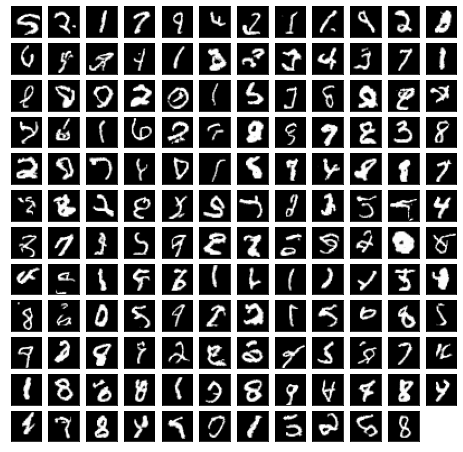

In [18]:
generate_images(model)